In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Style configuration for professional plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (15, 8)
plt.rcParams['font.size'] = 12

print("Libraries loaded successfully.")

Libraries loaded successfully.


In [ ]:
# 1. Load Data
data_path = 'training_data.csv'
try:
    df = pd.read_csv(data_path, parse_dates=['datetime'], index_col='datetime')
    print(f"Data Loaded. Shape: {df.shape}")
    print(f"Date Range: {df.index.min()} to {df.index.max()}")
except FileNotFoundError:
    print("Error: 'training_data.csv' not found.")
    raise

df.head()

Data Loaded. Shape: (2450, 3)
Date Range: 2025-09-23 01:00:00 to 2026-01-04 09:00:00


,price,volume,Sentiment Score
datetime,,,
2025-09-23 01:00:00,4169.120117,0,0.0
2025-09-23 02:00:00,4152.844238,0,0.0
2025-09-23 03:00:00,4189.523926,1686368256,0.0
2025-09-23 04:00:00,4179.409668,0,0.0
2025-09-23 05:00:00,4186.941406,0,0.0


In [ ]:
# 2. Data Overview & Integrity
print("\n--- Dataset Info ---")
print(df.info())

print("\n--- Descriptive Statistics ---")
print(df.describe())


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2450 entries, 2025-09-23 01:00:00 to 2026-01-04 09:00:00
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            2450 non-null   float64
 1   volume           2450 non-null   int64  
 2   Sentiment Score  2450 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 76.6 KB
None

--- Descriptive Statistics ---
             price        volume  Sentiment Score
count  2450.000000  2.450000e+03      2450.000000
mean   3491.839387  4.575968e+08        -0.140161
std     541.149597  1.008337e+09         0.217024
min    2684.168701  0.000000e+00        -1.000000
25%    3004.613586  0.000000e+00        -0.254322
50%    3323.855103  0.000000e+00        -0.129655
75%    3958.146912  5.903944e+08        -0.021087
max    4741.292969  2.587066e+10         0.911110


## 3. Visualization Analysis

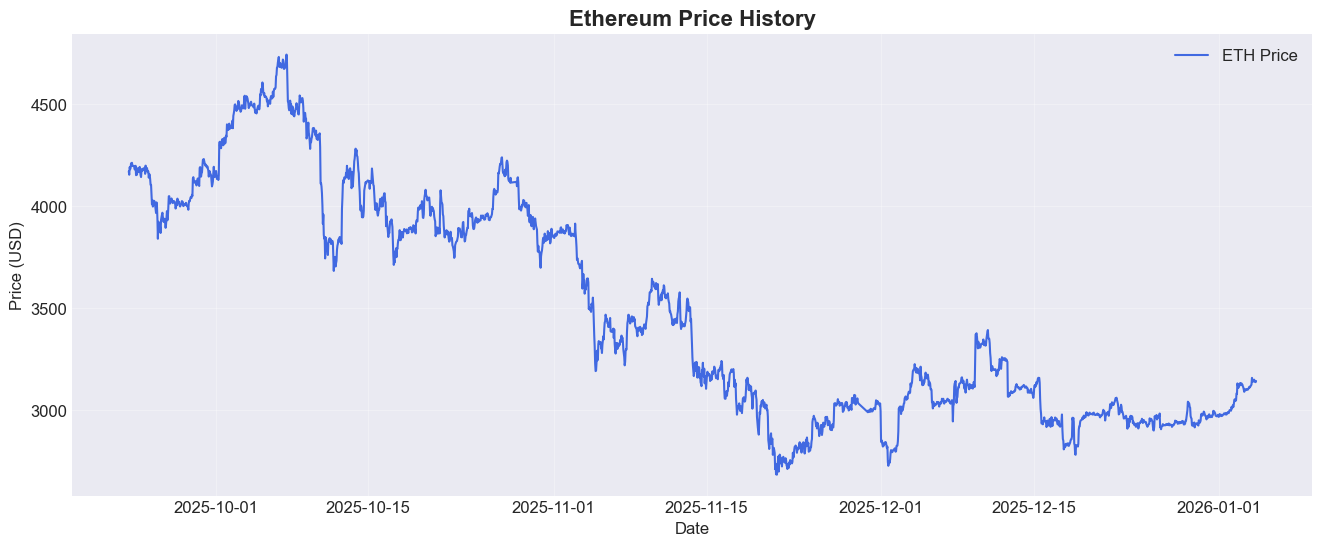

In [4]:
# 3.1 Price History
plt.figure(figsize=(16, 6))
plt.plot(df.index, df['price'], label='ETH Price', color='royalblue', linewidth=1.5)
plt.title('Ethereum Price History', fontsize=16, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

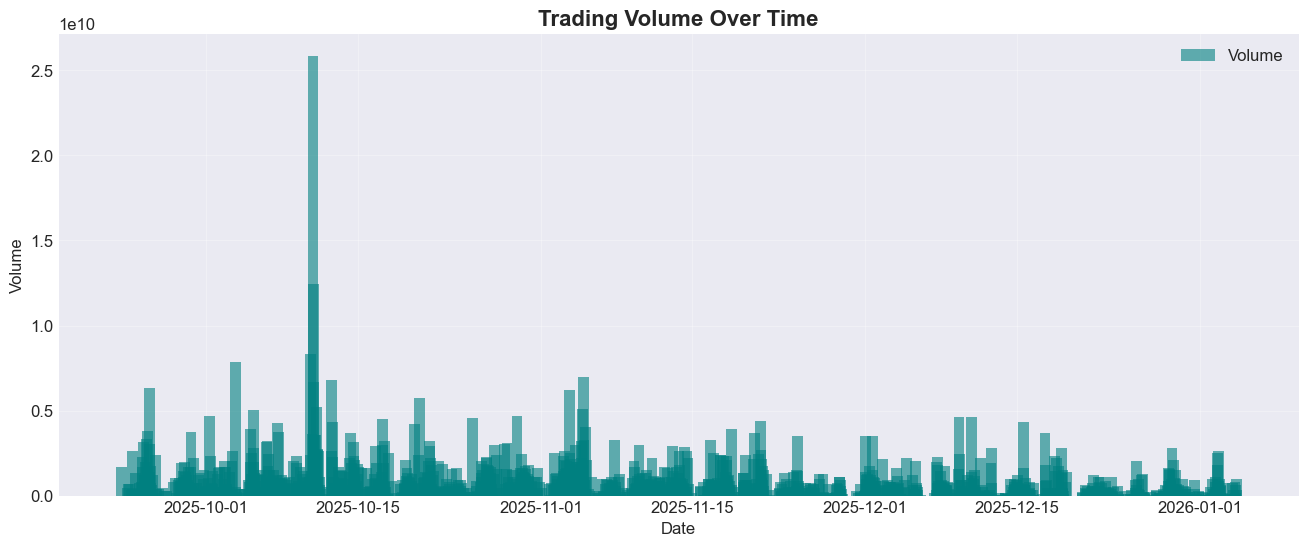

In [5]:
# 3.2 Trading Volume Analysis
plt.figure(figsize=(16, 6))
plt.bar(df.index, df['volume'], color='teal', alpha=0.6, width=1.0, label='Volume')
plt.title('Trading Volume Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

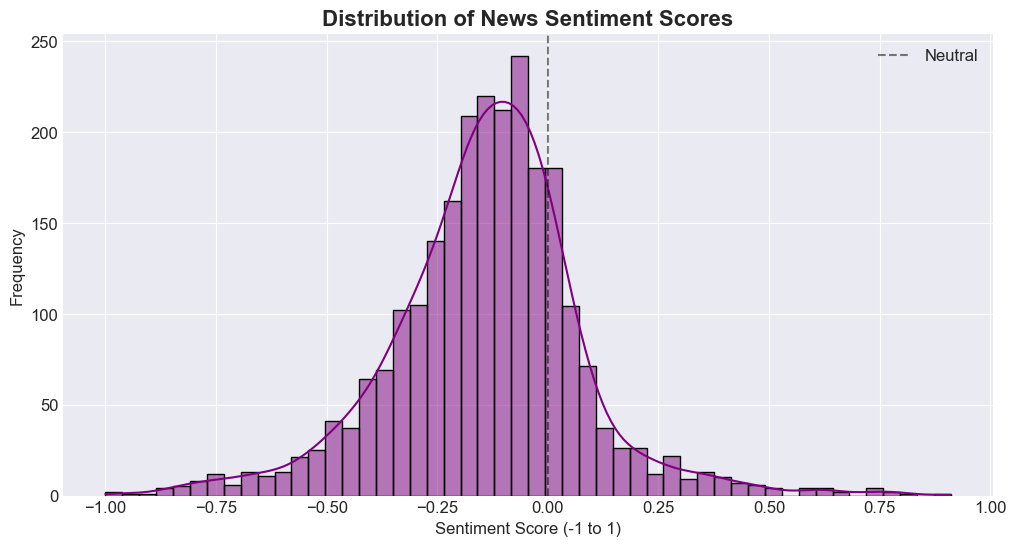

In [6]:
# 3.3 Sentiment Analysis Distribution
if 'Sentiment Score' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.histplot(df['Sentiment Score'], kde=True, color='purple', bins=50)
    plt.title('Distribution of News Sentiment Scores', fontsize=16, fontweight='bold')
    plt.xlabel('Sentiment Score (-1 to 1)')
    plt.ylabel('Frequency')
    plt.axvline(x=0, color='black', linestyle='--', alpha=0.5, label='Neutral')
    plt.legend()
    plt.show()
else:
    print("Column 'Sentiment Score' not found.")

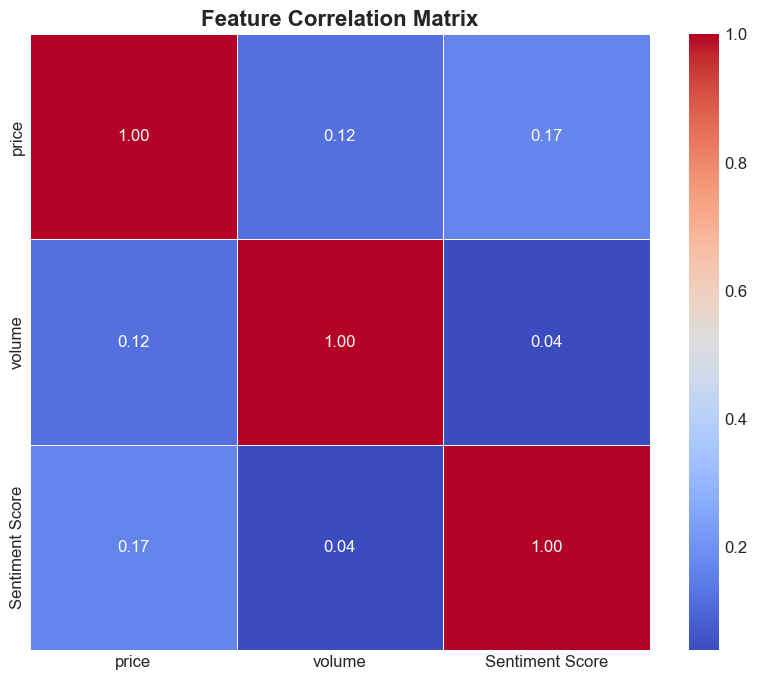

In [7]:
# 3.4 Correlation Matrix Heatmap
plt.figure(figsize=(10, 8))
corr_cols = [c for c in ['price', 'volume', 'Sentiment Score', 'volatility', 'open', 'high', 'low'] if c in df.columns]
correlation = df[corr_cols].corr()

sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold')
plt.show()

Calculating volatility feature for visualization...


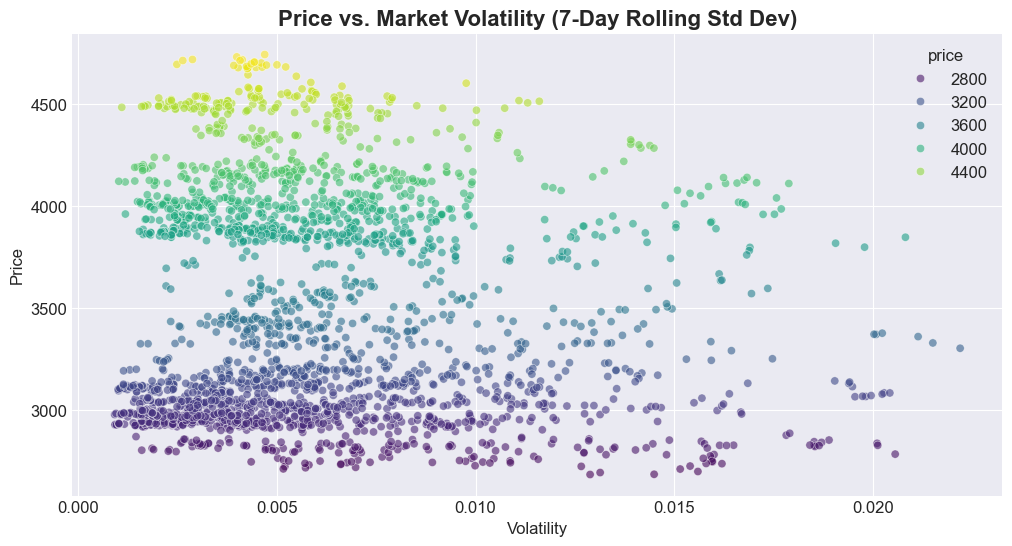

In [ ]:
# 3.5 Price vs. Volatility Scatter Plot
if 'volatility' not in df.columns:
    print("Calculating volatility feature for visualization...")
    df['returns'] = df['price'].pct_change()
    df['volatility'] = df['returns'].rolling(window=7).std()

plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['volatility'], y=df['price'], hue=df['price'], palette='viridis', alpha=0.6)
plt.title('Price vs. Market Volatility (7-Day Rolling Std Dev)', fontsize=16, fontweight='bold')
plt.xlabel('Volatility')
plt.ylabel('Price')
plt.show()

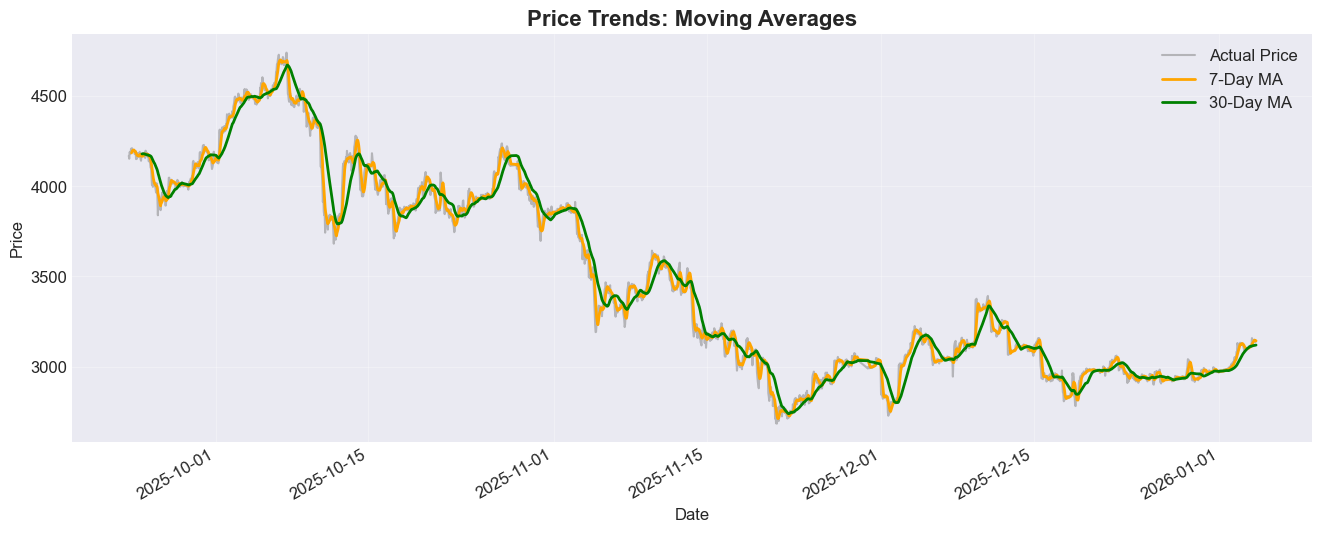

In [9]:
# 3.6 Rolling Mean Analysis (Trend Detection)
plt.figure(figsize=(16, 6))
df['price'].plot(label='Actual Price', alpha=0.5, color='gray')
df['price'].rolling(window=7).mean().plot(label='7-Day MA', color='orange', linewidth=2)

if len(df) > 30:
    df['price'].rolling(window=30).mean().plot(label='30-Day MA', color='green', linewidth=2)

plt.title('Price Trends: Moving Averages', fontsize=16, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()